In [1]:
import pandas as pd
data = pd.read_csv("car_evaluation.csv")

In [2]:
data

,vhigh,vhigh.1,2,2.1,small,low,unacc
0,vhigh,vhigh,2,2,small,med,unacc
1,vhigh,vhigh,2,2,small,high,unacc
2,vhigh,vhigh,2,2,med,low,unacc
3,vhigh,vhigh,2,2,med,med,unacc
4,vhigh,vhigh,2,2,med,high,unacc
...,...,...,...,...,...,...,...
1722,low,low,5more,more,med,med,good
1723,low,low,5more,more,med,high,vgood
1724,low,low,5more,more,big,low,unacc
1725,low,low,5more,more,big,med,good


In [4]:
import csv


def load_dataset(filename):
    dataset = []
    with open(filename, 'r') as file:
        csv_reader = csv.reader(file)
        for row in csv_reader:
            dataset.append(row)
    return dataset


def split_dataset(dataset, split_ratio):
    train_size = int(len(dataset) * split_ratio)
    train_set = dataset[:train_size]
    test_set = dataset[train_size:]
    return train_set, test_set


def separate_by_class(dataset):
    separated = {}
    for data in dataset:
        class_label = data[-1]
        if class_label not in separated:
            separated[class_label] = []
        separated[class_label].append(data)
    return separated


def calculate_class_probabilities(dataset):
    separated = separate_by_class(dataset)
    class_probabilities = {}
    for class_label, data in separated.items():
        class_probabilities[class_label] = len(data) / len(dataset)
    return class_probabilities


def calculate_attribute_probabilities(dataset):
    separated = separate_by_class(dataset)
    attribute_probabilities = {}
    for class_label, data in separated.items():
        attribute_probabilities[class_label] = []
        for attribute_index in range(len(data[0]) - 1):
            attribute_values = [data[i][attribute_index] for i in range(len(data))]
            attribute_counts = {}
            for value in attribute_values:
                if value not in attribute_counts:
                    attribute_counts[value] = 0
                attribute_counts[value] += 1
            attribute_probabilities[class_label].append(attribute_counts)
    return attribute_probabilities


def predict(class_probabilities, attribute_probabilities, input_data, dataset, k):
    best_label, best_prob = None, -1
    for class_label, class_probability in class_probabilities.items():
        probability = class_probability
        for attribute_index in range(len(input_data) - 1):
            attribute_value = input_data[attribute_index]
            if attribute_value in attribute_probabilities[class_label][attribute_index]:
                probability *= attribute_probabilities[class_label][attribute_index][attribute_value] / len(separate_by_class(dataset)[class_label])
            else:
                probability *= 1 / len(separate_by_class(dataset)[class_label])  # Laplace smoothing
        if best_label is None or probability > best_prob:
            best_label = class_label
            best_prob = probability
    return best_label


def evaluate_model(class_probabilities, attribute_probabilities, test_set, dataset, k):
    predictions = []
    for data in test_set:
        prediction = predict(class_probabilities, attribute_probabilities, data, dataset, k)
        predictions.append(prediction)
    return predictions


def calculate_accuracy(predictions, test_set):
    correct = 0
    for i in range(len(test_set)):
        if test_set[i][-1] == predictions[i]:
            correct += 1
    return correct / float(len(test_set)) * 100.0


def main():
    filename = 'car_evaluation.csv'
    split_ratio = 0.8

    dataset = load_dataset(filename)
    train_set, test_set = split_dataset(dataset, split_ratio)

    class_probabilities = calculate_class_probabilities(train_set)
    attribute_probabilities = calculate_attribute_probabilities(train_set)

    k = 2
    predictions = evaluate_model(class_probabilities, attribute_probabilities, test_set, dataset, k)
    accuracy = calculate_accuracy(predictions, test_set)

    print(f'Accuracy: {accuracy:.2f}%')

if __name__ == '__main__':
    main()


Accuracy: 67.63%


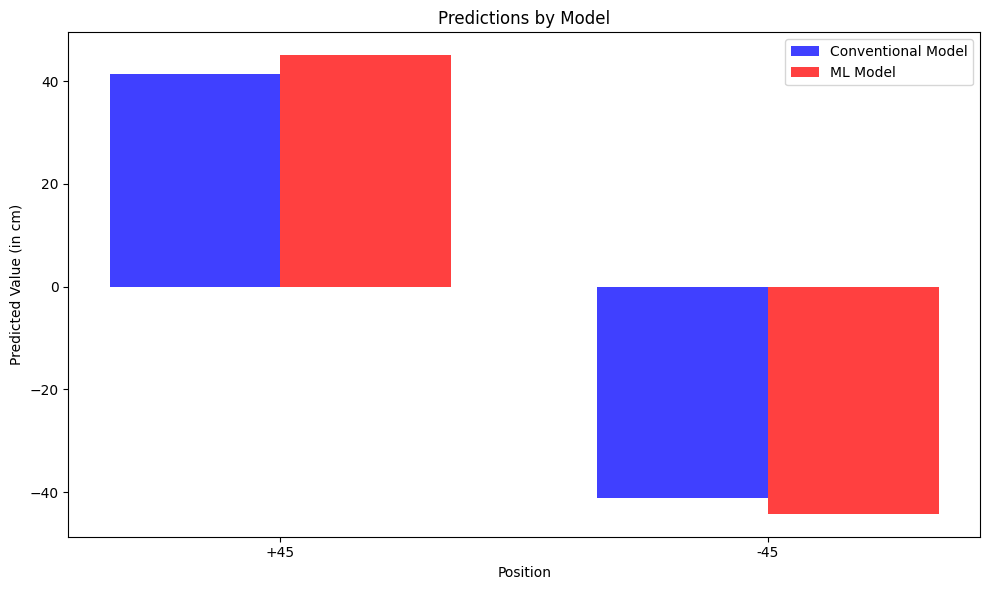

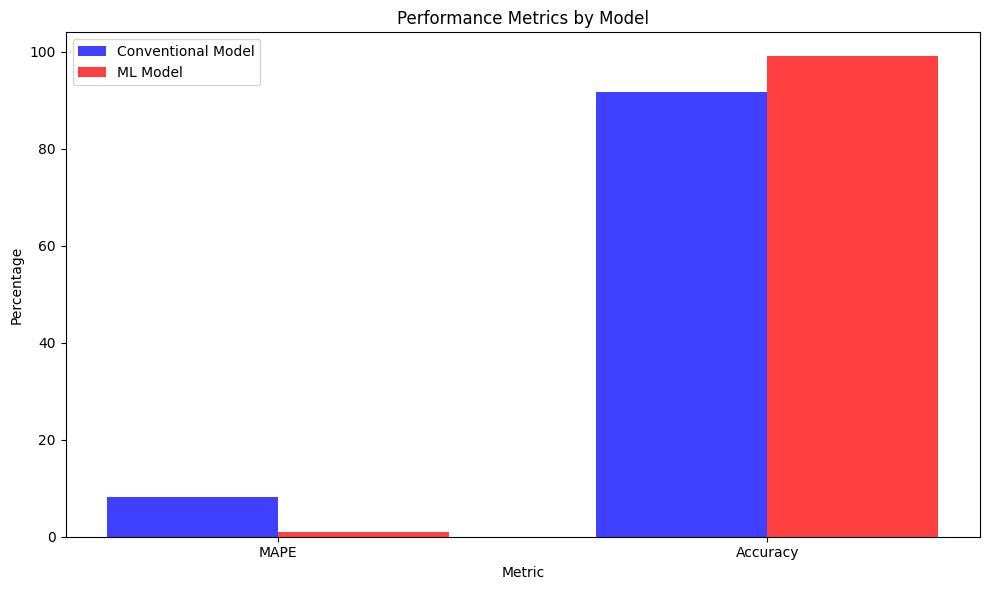

Mean squared error (Training) for ML Model: 0.0039


In [1]:
import matplotlib.pyplot as plt

# Data
positions = ["+45", "-45"]
conventional_predictions = [41.38, -41.18]
ml_predictions = [45.04, -44.21]

metrics = ["MAPE", "Accuracy"]
conventional_metrics = [8.265, 91.735]
ml_metrics = [0.922, 99.0778]

mse = 0.0039

# Plotting Predictions
plt.figure(figsize=(10, 6))
bar_width = 0.35
index = range(len(positions))
bar1 = plt.bar(index, conventional_predictions, bar_width, label='Conventional Model', color='b', alpha=0.75)
bar2 = plt.bar([i+bar_width for i in index], ml_predictions, bar_width, label='ML Model', color='r', alpha=0.75)
plt.xlabel('Position')
plt.ylabel('Predicted Value (in cm)')
plt.title('Predictions by Model')
plt.xticks([i+bar_width/2 for i in index], positions)
plt.legend()
plt.tight_layout()
plt.show()

# Plotting Performance Metrics
plt.figure(figsize=(10, 6))
bar1 = plt.bar(index, conventional_metrics, bar_width, label='Conventional Model', color='b', alpha=0.75)
bar2 = plt.bar([i+bar_width for i in index], ml_metrics, bar_width, label='ML Model', color='r', alpha=0.75)
plt.xlabel('Metric')
plt.ylabel('Percentage')
plt.title('Performance Metrics by Model')
plt.xticks([i+bar_width/2 for i in index], metrics)
plt.legend()
plt.tight_layout()
plt.show()

# Displaying MSE for ML model (can be included in the metrics graph or separately)
print(f"Mean squared error (Training) for ML Model: {mse}")
